In [5]:
%matplotlib inline
# For loading data and colorspace conversion
import cv2

import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get current dir
import os
cwd = os.getcwd()
import sys
sys.path.append(os.path.join(cwd, '..'))

# For classification/detection
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from aye.preprocessing import *

In [6]:
# Preprocessing
reader = DataReader()
X, y = prepare_data(reader, range(4))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X: {0}, y: {1}'.format(X.shape, y.shape))

X: (16683, 9), y: (16683,)


In [7]:
# Split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3)

In [9]:
# Train two different svm
clfp = SVC(probability=True)
clfb = SVC(probability=False)
clfp.fit(X_train, y_train)
clfb.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
score_clfp = clfp.score(X_valid, y_valid)
score_clfb = clfb.score(X_valid, y_valid)
print('clfp: {0}, clfb: {1}'.format(score_clfp, score_clfb))

clfp: 0.997002997003, clfb: 0.997002997003


In [38]:
# Load another image
im_raw, labels = reader.read_image_with_label(5)
s = Samples(im_raw)
X_test = scaler.transform(s.X())
y_test_b = clfb.predict(X_test)
y_test_p = clfp.predict_proba(X_test)

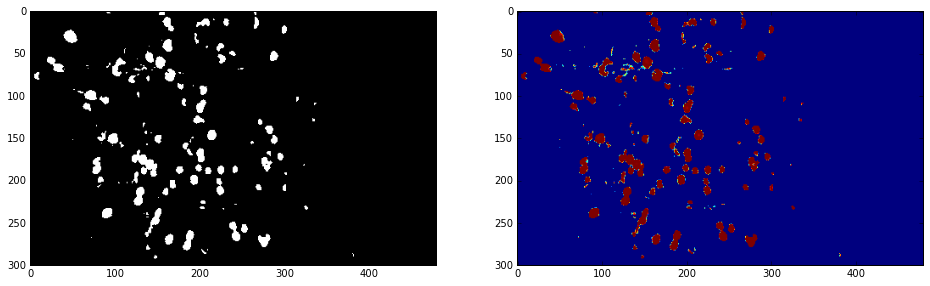

In [43]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
bw_test_b = s.y_to_bw(y_test_b)
ax.imshow(bw_test_b, cmap=plt.cm.gray)

y_test_a = y_test_p[:,1]
p = 0.2
h, w = s.mask.shape
m = np.reshape(s.mask, (-1,))
idx = np.array(np.where(m)).ravel()
idx = idx[y_test_a > p]
hmap = np.zeros((h * w,))
hmap[idx] = y_test_a[y_test_a > p]
hmap = np.reshape(hmap, (h, w))

ax = fig.add_subplot(122)
ax.imshow(hmap)

# It seems like that predict probability is not very useful, so ditch this idea